m2dsupsdlclass/lectures-labs  
https://github.com/m2dsupsdlclass/lectures-labs/blob/master/labs/02_backprop/Backpropagation_numpy.ipynb  
implementING a real gradient descent in Numpy

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

------------------------------


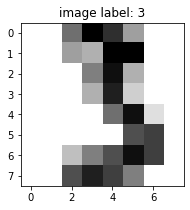

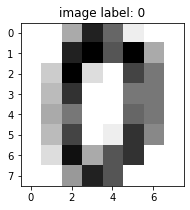

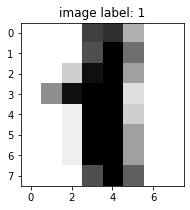

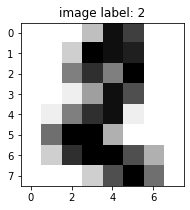

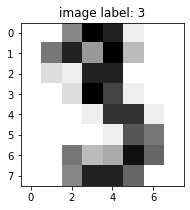

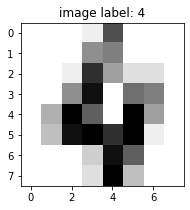

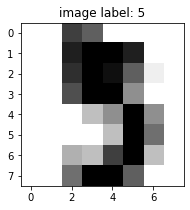

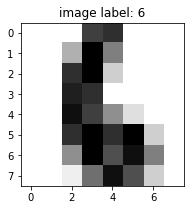

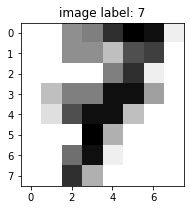

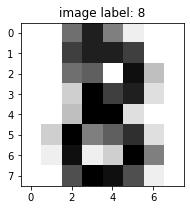

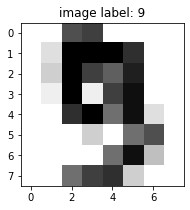

In [32]:
sample_index = 45

plt.figure(figsize=(3, 3))

plt.imshow(digits.images[sample_index],
    cmap=plt.cm.gray_r,
    interpolation='nearest')





# digits.target - labels for each of the examples in the dataset
plt.title("image label: %d" % digits.target[sample_index]);

print("------------------------------")
for i in range(0,10):
    plt.figure(figsize=(3, 3))
    plt.title("image label: %d" % digits.target[i]);
    plt.imshow(digits.images[i],
        cmap          = plt.cm.gray_r,
        interpolation = 'nearest')

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# cast digits.data/digits.target ndarray from float64/int64 to float32/int32
data   = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

print(digits.data)
print(digits.data.dtype)
print(digits.target.dtype)
print("-----------------------------------------------------")
print(data)
print(data.dtype)
print(target.dtype)


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# IMAGE_PREPROCESSING
# mean = 0 ; standard deviation = 1.0
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# class sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
# 
# Standardization of a dataset is a common requirement for many machine learning estimators:
# they might behave badly if the individual features do not more or less look like standard
# normally distributed data (e.g. Gaussian with 0 mean and unit variance).
# Centering and scaling happen independently on each feature by computing the relevant
# statistics on the samples in the training set. Mean and standard deviation are then stored
# to be used on later data using transform.
# 
# Statistical properties of the entire training/test datasets are first analyzed/accumulated,
# and then individual examples and their individual features/pixels are modified/normalized
# to fit into a normalized range according to their global distribution properties.
scaler  = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

print("--------------------------------------")
print(X_train.shape)
print(X_train.dtype)

print(X_test.shape)

print(y_train.shape)
print(y_train.dtype)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
float64
int64
-----------------------------------------------------
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
float32
int32
--------------------------------------
(1527, 64)
float32
(270, 64)
(1527,)
int32


In [154]:

# np.eye() - https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html
#            Return a 2-D array with ones on the diagonal and zeros elsewhere.
#            numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
#            N - Number of rows in the output.
#            k - Index of the diagonal: 0 (the default) refers to the main diagonal
print(np.eye(10, k=0))
print("=============")

def one_hot(n_classes: int, y: int):
    # [y] - picks the row of the identity matrix, since thats
    #       the row that contains the diagonal value (one-hot-encoding)
    #       that we want.
    return np.eye(n_classes)[y]

print("ONE_HOT_ENCODING")
for i in digits.target[0:20]:
    print(one_hot(n_classes=10, y=i))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
ONE_HOT_ENCODING
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


- Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.   
- takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.  
- after applying softmax, each component will be in the interval ( 0 , 1 ) {\displaystyle (0,1)} (0,1), and the components will add up to 1, so that they can be interpreted as probabilities
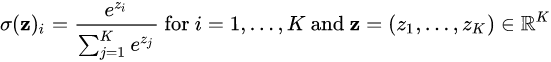


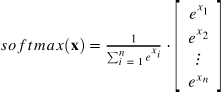

In [ ]:

import tensorflow as tf
tf.executing_eagerly()

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
t = tf.nn.softmax(logits, axis=None, name=None)
print(t)

[0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
[0.02134556 0.1427142  0.02607153 0.0235905  0.05250162 0.17431152
 0.3879374  0.0288135  0.1427142 ]
sum of softmax components - 1.0


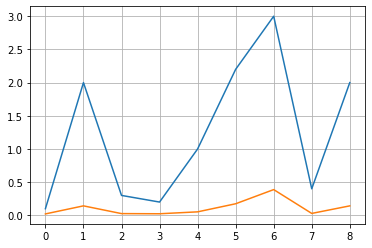

In [37]:
# SOFTMAX_TENSORFLOW

import tensorflow as tf

sess = tf.compat.v1.Session()

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]

# SOFTMAX
t = tf.nn.softmax(logits, axis=None, name=None)
print(logits)
print(sess.run(t))
print("sum of softmax components - %s"%(np.sum(sess.run(t))))

import matplotlib.pyplot as plt

plt.grid(True)
plt.plot(range(0, len(logits)),
    logits)

plt.plot(range(0, len(logits)),
    sess.run(t))

[0.02134556 0.14271419 0.02607153 0.0235905  0.05250162 0.17431151
 0.3879374  0.0288135  0.14271419]


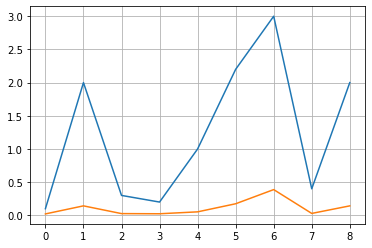

In [164]:

#-------------------------------------------------------------
# SOFTMAX__MANUAL
def softmax(X):
    assert isinstance(X, np.ndarray)
    
    exp = np.exp(X)
    # print(np.sum(exp, axis=-1, keepdims=True))
    return exp / np.sum(exp, axis=-1, keepdims=True)

#-------------------------------------------------------------
logits = np.array([0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2])
print(softmax(logits))

plt.grid(True)
plt.plot(range(0, len(logits)),
    logits)

plt.plot(range(0, len(logits)),
    sess.run(t))

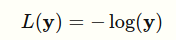    
Negative Log-Likelihood (NLL)    
Loss Function   
log-likelyhood is usually used for a set of values (for continuous median square error is preffered)   
http://wiki.fast.ai/index.php/Log_Loss

$$L(y) = - \log(y)$$

Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1   
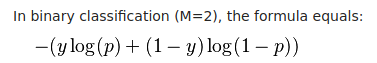

$$-(y \log p + (1 - y)\log(1 - p))$$

In [165]:

#-------------------------------------------------------------
# LOSS
# SINGLE_EXAMPLE
# https://stats.stackexchange.com/questions/113301/multi-class-logarithmic-loss-function-per-class
    
def loss__negative_log_likelihood(Y_true, Y_pred):
    '''
    Y_true - one-hot encoding
    Y_pred - probability distribution across all possible classes
    '''
    # only the one-hot encoding member that is set (to 1) is actually influencing
    # the outputed loss value because all other members are 0 and Y_true * np.log would
    # be 0 as well and wouildnt contribute to the result
    _nll = -np.sum(Y_true * np.log(Y_pred))
    return _nll

# def negative_log_likelihood(p_true_val, p_predict_val):
#     # tf.log() - log with base "e"
#     return -(p_true_val * np.log(p_predict_val) + (1.0 - p_true_val) * np.log(1 - p_predict_val))

#-------------------------------------------------------------
# LOSS
# SINGLE_EXAMPLE
# p_true_prob - probability distribution vector where only a sincle element is 1, rest are 0.
#               this is the true value, a one-hot encoding of the true class/label.
# p_predicted_prob - prob. dist. vector where most elements are non-0, and one element (predicted class)
#                    is of higher value (prob) then all other elements (its the predicted class/label)
def loss(p_true_prob, p_predicted_prob):
    return loss__negative_log_likelihood(p_true_prob, p_predicted_prob)

#-------------------------------------------------------------

(array([ 2.,  3.,  4.,  4., 13., 13., 23., 19., 17., 17., 19., 27., 21.,
        24., 17., 16., 26., 25., 27., 22., 24., 23., 27., 23., 18., 11.,
        18., 11.,  3.,  3.]),
 array([1.70992288, 1.75029984, 1.79067681, 1.83105377, 1.87143073,
        1.9118077 , 1.95218466, 1.99256163, 2.03293859, 2.07331556,
        2.11369252, 2.15406949, 2.19444645, 2.23482342, 2.27520038,
        2.31557735, 2.35595431, 2.39633127, 2.43670824, 2.4770852 ,
        2.51746217, 2.55783913, 2.5982161 , 2.63859306, 2.67897003,
        2.71934699, 2.75972396, 2.80010092, 2.84047789, 2.88085485,
        2.92123181]),
 <a list of 30 Patch objects>)

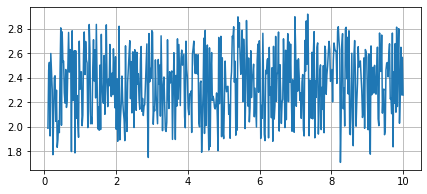

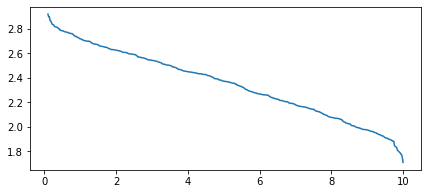

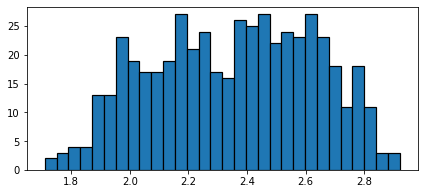

In [166]:


classes_num_int = 10
samples_num_int = 500
x_lst = np.linspace(0.1, 10, samples_num_int)
    

random_classes_lst = np.floor(np.random.random(samples_num_int)*10)
loss_lst           = []

for c in random_classes_lst:
    true_prob = one_hot(n_classes=classes_num_int, y=int(c))
    pred_prob = softmax(np.random.random(classes_num_int)) # randomized 
    
    loss_int  = loss(true_prob, pred_prob)
    loss_lst.append(loss_int)

plt.figure(figsize=(7, 3))
plt.grid(True)
plt.plot(x_lst, loss_lst)

plt.figure(figsize=(7, 3))
plt.plot(x_lst, np.flip(np.sort(loss_lst)))

plt.figure(figsize=(7, 3))
plt.hist(loss_lst, edgecolor='black', linewidth=1.2, bins=30)


In [1]:
class Model():
    def __init__(self,
        p_input_size,
        p_output_size,
        p_W,
        p_b):
        self.input_size = p_input_size
        self.output_size = p_output_size
        self.W           = p_W
        self.b           = p_b
        
#-------------------------------------------------------------
# INIT
def mod__init(p_input_size, p_output_size):
    W = np.random.uniform(size = (p_input_size, p_output_size),
       high = 0.1,
       low  = -0.1)
    
    b = np.random.uniform(size = p_output_size,
        high = 0.1,
        low  = -0.1)

    model = Model(p_input_size,
        p_output_size,
        W,
        b)
    return model
        
#-------------------------------------------------------------
# FORWARD_PASS
def mod__forward_pass(X, p_model):
    Z = np.dot(X, p_model.W) + p_model.b
    return softmax(Z)

#-------------------------------------------------------------
# PREDICT
def mod__predict(X, p_model):
    if len(X.shape) == 1:
        return np.argmax(mod__forward_pass(X, p_model))
    else:
        return np.argmax(mod__forward_pass(X, p_model), axis=1)

#-------------------------------------------------------------
# TRAIN
def mod__train(x, y, p_learning_rate, p_model):
    
    # print("============")
    # print(x)
    # print(y)
    
    # GRADIENT
    grads = mod__grad_loss(x, y, p_model)
    
    # Traditional SGD update without momentum
    p_model.W = p_model.W - p_learning_rate * grads["W"]
    p_model.b = p_model.b - p_learning_rate * grads["b"]      

#-------------------------------------------------------------
# LOSS
def mod__loss(x, y, p_model):
    # assert isinstance(y, np.ndarray)
    
    true_prob      = one_hot(n_classes=p_model.output_size, y=y)
    predicted_prob = mod__forward_pass(x, p_model)
    
    loss_int = loss(true_prob, predicted_prob)
    
    return loss_int

#-------------------------------------------------------------
# GRADIENT_OF_LOSS
def mod__grad_loss(x, y_true, p_model):
    
    # dnll_loss_int = mod__loss(x, y_true, p_model)
    
    
    # FIX!!! - why is here this kind of loss used, and not the loss 
    #          mod__loss() thats used everywhere else.
    #          here for the loss function only subtraction (dnll_loss_int = y_pred - y_true_onehot)
    #          is used.
    #          if mod__loss() is used then loss is 0 and accuracy 100%, which 
    #          is suspicious. with this simple subtraction accuracy is high-90s.
    y_pred        = mod__forward_pass(x, p_model) 
    y_true_onehot = one_hot(n_classes=p_model.output_size, y=y_true)
    
    
    # this formula (y_pred - y_true)^2 is not  NLL (log-loss) function, but a square-loss
    # function. so its not clear why the author used the NLL name for the output here.
    # this square-loss derivation we can see in the Loss derivative function pasted in bellow
    # (from the Kamper paper).
    d_loss = y_pred - y_true_onehot
    
    grad_W      = np.outer(x, d_loss)
    grad_b      = d_loss
    grads       = {"W": grad_W, "b": grad_b}
    return grads

#-------------------------------------------------------------
# ACCURACY
def mod__accuracy(X, y, p_model):
    
    print("ACCURACY============================")

    # vector of predicted labels for input data X
    # np.argmax() - gives the vector index of the highest-value vector element
    y_outputs = mod__forward_pass(X, p_model)
    y_preds   = np.argmax(y_outputs, axis=1)
    
    correct_preds_num_int = len([t for t in y_preds == y if t])
    print(y_preds)
    print("correct_preds_num_int - %s"%(correct_preds_num_int))
    print(y_preds == y)
    print(np.mean(y_preds == y))
    print(correct_preds_num_int/len(y_preds))
    
    # y_preds == y are cases where the prediction is correct.
    # np.mean() - Compute the arithmetic mean along the specified axis.
    #             with a vector of boolean values "True" values are 1,
    #             and False is 0. np.mean() would add up all 1's and 
    #             divide by total number of elements for the mean.
    # mean - For a data set, the arithmetic mean, also called the mathematical
    #        expectation or average, is the central value of a discrete set of numbers:
    #        specifically, the sum of the values divided by the number of values.
    accuracy = np.mean(y_preds == y)
    return accuracy


https://www.kamperh.com/notes/kamper_backprop17.pdf

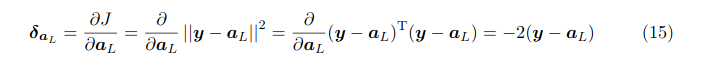

In [175]:
# number of features per example
n_features = X_train.shape[1]
n_classes  = len(np.unique(y_train))

print("n_features - %s"%(n_features))
print("n_classes  - %s"%(n_classes))

model = mod__init(n_features, n_classes)

print("Evaluation of the untrained model:")
train_loss = mod__loss(X_train, y_train, model)
train_acc  = mod__accuracy(X_train, y_train, model)
test_acc   = mod__accuracy(X_test, y_test, model)

print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (train_loss, train_acc, test_acc))

n_features - 64
n_classes  - 10
Evaluation of the untrained model:
ACCURACY============================
[1 8 3 ... 6 4 0]
correct_preds_num_int - 175
[False False False ... False  True False]
0.114603798297315
0.114603798297315
ACCURACY============================
[6 0 6 8 8 6 4 0 6 9 1 6 1 9 0 9 6 1 7 0 2 2 6 5 1 6 8 1 8 3 9 1 8 5 0 9 4
 0 8 0 9 0 5 8 7 5 1 2 5 4 5 4 6 6 9 0 1 9 6 9 0 1 5 5 6 3 0 6 0 5 2 6 4 7
 0 6 0 1 5 5 4 3 3 8 9 1 9 6 4 4 0 6 5 9 0 3 9 7 3 6 8 5 7 0 4 7 1 6 5 1 6
 6 8 9 3 4 4 5 8 0 1 6 9 9 1 8 0 9 8 6 4 9 9 0 9 8 5 4 0 9 1 6 2 5 5 5 6 1
 1 4 8 9 9 9 0 1 7 6 7 3 0 8 0 9 0 5 0 0 5 9 8 7 6 5 6 8 8 5 8 0 4 1 5 5 9
 9 4 4 8 6 5 4 4 7 5 1 4 6 1 9 5 9 9 1 6 5 0 4 3 8 4 3 8 1 4 9 9 0 9 7 9 9
 8 2 9 1 4 5 8 2 1 9 6 5 0 2 7 2 7 6 5 6 2 9 8 0 0 0 4 5 6 6 9 9 1 5 4 6 4
 1 3 1 6 9 8 5 5 0 8 6]
correct_preds_num_int - 21
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False 

In [ ]:
# TODO - convert the training algorithm from single-example training, to batch-example training.
#        train function is to take as input vector of examples and labels, of lenght BATCH (input parameter).
#        currently its taking single values.
#        modify the training loop as well, to add epoch, and per ephoch randomly suffle X/Y input datasets,
#        so that batches (per training loop) are randomized each time.

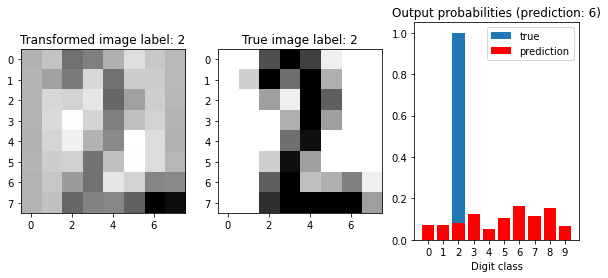

In [176]:



def plot_prediction(p_model, p_sample_idx=0, p_classes=range(10)):
    
    x_test = X_test[p_sample_idx]
    
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
    
    # INPUT_IMG
    ax0.imshow(x_test.reshape(8, 8), # scaler.inverse_transform(x_test).reshape(8, 8),
        cmap          = plt.cm.gray_r,
        interpolation = 'nearest')
    ax0.set_title("Transformed image label: %d" % y_test[p_sample_idx]);

    # INPUT_IMG
    ax1.imshow(scaler.inverse_transform(x_test).reshape(8, 8),
        cmap          = plt.cm.gray_r,
        interpolation = 'nearest')
    ax1.set_title("True image label: %d" % y_test[p_sample_idx]);
    
    
    ax2.bar(p_classes, one_hot(n_classes=len(p_classes), y=y_test[p_sample_idx]), label='true')
    ax2.bar(p_classes, mod__forward_pass(x_test, p_model), label='prediction', color="red")
    
    ax2.set_xticks(p_classes)
    
    # PREDICT
    prediction_int = mod__predict(x_test, p_model)
    ax2.set_title('Output probabilities (prediction: %d)' % prediction_int)
    
    ax2.set_xlabel('Digit class')
    ax2.legend()
    
plot_prediction(model, p_sample_idx=0)

ACCURACY============================
[2 8 3 ... 6 4 0]
correct_preds_num_int - 191
[ True False False ... False  True False]
0.12508185985592665
0.12508185985592665
ACCURACY============================
[6 0 6 8 8 6 4 0 6 9 1 6 1 2 0 5 6 1 7 0 2 5 3 5 1 6 8 1 8 3 9 1 8 5 0 9 4
 0 8 0 9 0 5 8 4 5 1 2 5 4 5 4 6 6 9 0 1 9 6 9 0 1 5 5 6 3 0 6 0 5 2 6 4 7
 1 6 0 1 5 5 4 3 3 8 0 1 3 6 4 4 0 6 5 9 0 3 9 7 3 6 8 5 7 0 4 7 1 6 5 1 6
 6 8 9 3 4 4 5 8 0 1 3 9 9 1 8 0 9 8 6 4 9 9 0 9 8 5 4 0 9 1 6 2 5 5 5 6 1
 2 4 8 9 9 2 0 1 7 6 7 3 0 8 0 9 0 5 0 0 5 9 8 7 6 5 6 8 8 5 8 0 4 1 5 5 2
 9 4 4 8 6 5 4 4 7 5 1 4 6 1 9 5 9 9 1 6 5 0 4 3 8 4 3 8 1 4 9 9 0 9 7 9 9
 8 2 9 1 4 5 8 5 1 9 6 5 0 2 7 5 7 6 5 6 2 9 9 0 0 0 4 5 6 6 9 9 6 5 4 6 4
 2 3 2 6 9 8 5 5 0 8 6]
correct_preds_num_int - 22
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False  True
 Fa

Update #1200, train loss: 420.4178, train acc: 0.947, test acc: 0.956
ACCURACY============================
[2 9 5 ... 9 4 8]
correct_preds_num_int - 1447
[ True  True  True ...  True  True False]
0.9476096922069417
0.9476096922069417
ACCURACY============================
[2 4 7 9 1 1 5 6 2 5 0 2 0 5 4 8 7 0 9 6 9 1 9 8 0 9 8 4 2 7 5 4 2 8 6 9 6
 8 8 6 5 7 8 1 6 5 0 1 9 4 8 5 3 9 3 4 4 6 7 5 4 0 3 8 1 2 6 8 6 5 1 7 4 7
 4 1 7 0 8 8 5 2 0 3 7 4 2 7 6 0 6 0 8 3 6 9 3 0 9 8 8 5 8 1 4 1 2 9 1 4 8
 9 9 0 9 5 6 8 2 1 4 5 3 8 7 0 4 2 1 1 5 2 5 6 9 1 2 7 6 0 9 2 1 6 8 2 1 4
 2 4 1 5 9 3 3 4 1 2 2 5 6 0 7 9 6 8 6 1 1 3 5 2 0 9 0 2 2 8 0 7 6 0 8 5 3
 9 5 7 9 9 8 0 7 1 8 4 7 7 4 0 8 9 4 0 8 8 6 5 0 1 6 2 0 4 7 5 3 7 3 4 5 9
 9 7 3 4 5 8 1 1 9 5 5 1 4 1 2 9 2 9 5 3 6 0 9 6 7 6 7 5 2 6 8 3 2 8 5 5 4
 2 2 5 0 5 2 8 8 7 9 0]
correct_preds_num_int - 257
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True

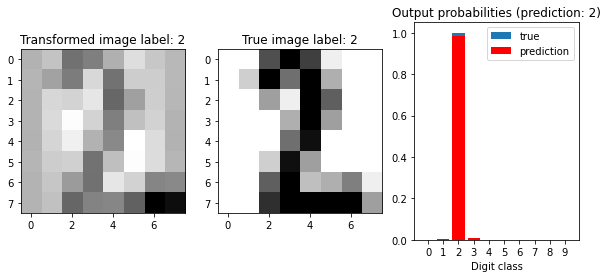

In [194]:
# Training for one epoch
learning_rate = 0.01


np.set_printoptions(suppress=True) # turn-off scientific notation (e+)
for i, (x, y) in enumerate(zip(X_train, y_train)):
    assert isinstance(x, np.ndarray)
    assert x.shape[0] == 64
    assert isinstance(y, np.int32)
    
    
    mod__train(x, y, learning_rate, model)
    
    if i % 100 == 0:
        train_loss = mod__loss(X_train, y_train, model)
        train_acc  = mod__accuracy(X_train, y_train, model)
        test_acc   = mod__accuracy(X_test, y_test, model)
        
        print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
              % (i, train_loss, train_acc, test_acc))
        
        
        

        
plot_prediction(model, p_sample_idx=0)